# Module 6 Assignment

###  By Niharika Madhadi

You've been asked to clean and explore a dataset containing employee ratings  for months of review cycles.

Enter your student id, in the next cell, when asked and then run the next two cells. The second cell will create the dataset you will be working on. If you run the second cell again, it will generate a new dataset so be aware.

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, do not edit
import random

# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11659474
my_seed = random.seed(stud_id)

In [ ]:
# run this cell as is, do not edit
import pandas as pd
import numpy as np
import re
import random
import urllib.request
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))

words = []

# "https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/words.txt'

for word in urllib.request.urlopen(url):
    words.append(word.decode('utf-8').replace('\n', ''))

capitalized = [word for word in words if word[0].isupper()]
proper_names  = [word for word in capitalized if not word.isupper()]

variables = []
for n in range(20):
    variables.append(' '.join([proper_names[random.randint(0, len(proper_names))] for i in range(2)]))

print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['blue', 'white']) for i in range(100)]
df['Collar'] = cats
cats = [random.choice(['opt in', 'opt out']) for i in range(100)]
df['401K'] = cats
cats = [random.choice(['medical plan 1', 'medical plan 2', 'medical plan 3']) for i in range(100)]
df['Medical'] = cats
cats = [random.choice(['5 stars', '4 stars', '3 stars', '2 stars', '1 star']) for i in range(100)]
df['Stars'] = cats

df['Total Sales'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('Assgn 6.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['Papua Burke', 'Perth Ferreira', 'Atreus Gobi', 'Seymour Helmut', 'Allen Steven', 'Ektachrome Alfred', 'Sussex Spaniard', 'Hyades Lana', 'Montague Oxonian', 'Daley Hubbell', "Netherlands O'Sullivan", 'Kremlin Woodlawn', 'Punjabi Olivier', 'Ralston Cypriot', 'Narragansett Eisenhower', 'Syria Payne', 'Slovakia Grenoble', 'Delaney Gotham', 'Crete Ivanhoe', 'Gettysburg Habib']


### Data Prep

In [ ]:
# create dataframe from Assgn 6.csv and print shape, info(), and head()

import pandas as pd

reviewdf = pd.read_csv('Assgn 6.csv')

print(reviewdf.shape)
print(reviewdf.info())
reviewdf.head()

(106, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crete Ivanhoe            96 non-null     float64
 1   Allen Steven             106 non-null    float64
 2   Ektachrome Alfred        106 non-null    float64
 3   Atreus Gobi              106 non-null    float64
 4   Netherlands O'Sullivan   106 non-null    float64
 5   Kremlin Woodlawn         106 non-null    float64
 6   Delaney Gotham           106 non-null    int64  
 7   Syria Payne              106 non-null    float64
 8   Hyades Lana              99 non-null     float64
 9   Narragansett Eisenhower  106 non-null    float64
 10  Gettysburg Habib         106 non-null    float64
 11  Slovakia Grenoble        106 non-null    int64  
 12  Punjabi Olivier          106 non-null    float64
 13  Perth Ferreira           103 non-null    float64
 14  Seymour Helmut  

,Crete Ivanhoe,Allen Steven,Ektachrome Alfred,Atreus Gobi,Netherlands O'Sullivan,Kremlin Woodlawn,Delaney Gotham,Syria Payne,Hyades Lana,Narragansett Eisenhower,...,Slovakia Grenoble,Punjabi Olivier,Perth Ferreira,Seymour Helmut,Ralston Cypriot,Collar,401K,Medical,Stars,Total Sales
0,0.280254,0.902557,0.03,-0.636635,0.596731,0.032114,680,1.5188,0.331842,0.07,...,3354,-0.759690,-0.833639,-0.636635,1.5188,white,opt out,medical plan 3,1 star,-33.233499
1,1.093305,0.868513,0.03,0.984677,-0.239315,-1.370288,715,0.4077,NaN,0.07,...,3562,-0.328174,-1.499857,0.984677,0.4077,white,opt out,medical plan 2,2 stars,-223.174358
2,0.385282,-1.233783,0.03,0.769068,1.831902,1.188791,264,0.5104,0.496738,0.07,...,3173,-1.153966,-0.781320,0.769068,0.5104,white,opt out,medical plan 3,4 stars,101.931314
3,0.735498,-0.112102,0.03,-1.856419,0.482759,-0.188359,275,0.6027,1.161206,0.07,...,4770,0.324920,-2.092209,-1.856419,0.6027,white,opt in,medical plan 3,2 stars,58.509277
4,0.126563,1.895074,0.03,-0.093283,-1.880253,0.809877,646,0.5777,0.451028,0.07,...,7571,0.221719,-0.624240,-0.093283,0.5777,blue,opt out,medical plan 3,5 stars,100.024240


In [ ]:
# identify constants

const = [
    i for i in reviewdf.columns if len(reviewdf[i].fillna(0).unique()) == 1
]

const

['Ektachrome Alfred', 'Narragansett Eisenhower']

In [ ]:
# drop constants

reviewdf.drop(const, axis=1, inplace=True)

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)

quasi_constants = []
for i in reviewdf.columns.sort_values():
    if (len(reviewdf[i].unique()) < 3):
        counts = reviewdf[i].value_counts(normalize=True)
        print(counts)
        if list(counts)[0] > .98:
            quasi_constants.append(i)
print('***********')
print('Quasi Constants are :', quasi_constants)

opt in     0.528302
opt out    0.471698
Name: 401K, dtype: float64
white    0.518868
blue     0.481132
Name: Collar, dtype: float64
***********
Quasi Constants are : []


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)

reviewdf.drop(quasi_constants,axis=1,inplace=True)
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crete Ivanhoe           96 non-null     float64
 1   Allen Steven            106 non-null    float64
 2   Atreus Gobi             106 non-null    float64
 3   Netherlands O'Sullivan  106 non-null    float64
 4   Kremlin Woodlawn        106 non-null    float64
 5   Delaney Gotham          106 non-null    int64  
 6   Syria Payne             106 non-null    float64
 7   Hyades Lana             99 non-null     float64
 8   Gettysburg Habib        106 non-null    float64
 9   Slovakia Grenoble       106 non-null    int64  
 10  Punjabi Olivier         106 non-null    float64
 11  Perth Ferreira          103 non-null    float64
 12  Seymour Helmut          99 non-null     float64
 13  Ralston Cypriot         106 non-null    float64
 14  Collar                  106 non-null    ob

In [ ]:
# identify duplicate rows

reviewdf[reviewdf.duplicated()]

,Crete Ivanhoe,Allen Steven,Atreus Gobi,Netherlands O'Sullivan,Kremlin Woodlawn,Delaney Gotham,Syria Payne,Hyades Lana,Gettysburg Habib,Slovakia Grenoble,Punjabi Olivier,Perth Ferreira,Seymour Helmut,Ralston Cypriot,Collar,401K,Medical,Stars,Total Sales
35,NaN,0.921470,-0.162037,0.681950,-0.723113,963,0.1236,0.505188,0.518484,8313,0.418482,-0.818516,-0.162037,0.1236,white,opt out,medical plan 2,4 stars,-2.486260
42,1.022199,0.456061,0.809364,0.153067,0.581739,619,-3.0101,0.728725,-0.825854,8690,-0.467868,-1.362382,0.809364,-3.0101,white,opt in,medical plan 1,3 stars,29.712082
83,1.381875,-0.300377,-0.352503,2.300679,1.732327,584,-2.3006,1.607482,0.471518,3156,0.253473,-1.612390,-0.352503,-2.3006,blue,opt out,medical plan 2,5 stars,220.309629
84,0.611588,1.358090,0.013098,-0.207472,-0.000993,741,-2.2204,0.646989,0.067125,7228,-0.526725,-0.873519,0.013098,-2.2204,white,opt in,medical plan 2,4 stars,-60.431379
93,0.685311,0.810469,-1.341670,2.077790,0.510366,717,0.6401,0.017993,0.711099,8745,-0.361431,-0.467144,-1.341670,0.6401,white,opt out,medical plan 3,3 stars,148.222667
100,0.810317,0.422253,-1.003382,0.394257,-1.512952,433,0.5230,0.314979,-0.196943,6681,-1.259320,-0.967083,-1.003382,0.5230,blue,opt in,medical plan 3,2 stars,-202.347460


In [ ]:
# drop duplicate rows and print shape

reviewdf.drop_duplicates(inplace=True)
print(reviewdf.shape)

(100, 19)


In [ ]:
# check of duplicate columns

duplicate_features = []
for i in range(0, len(reviewdf.columns)):
    org = reviewdf.columns[i]

    for j in reviewdf.columns[i + 1:]:
        if reviewdf[org].equals(reviewdf[j]):
            duplicate_features.append(j)
            print(f'{org} looks the same as {j}')

duplicate_features

Syria Payne looks the same as Ralston Cypriot


['Ralston Cypriot']

In [ ]:
# drop duplicate features

reviewdf.drop(['Ralston Cypriot'],axis=1,inplace=True)
print(reviewdf.shape)

(100, 18)


### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

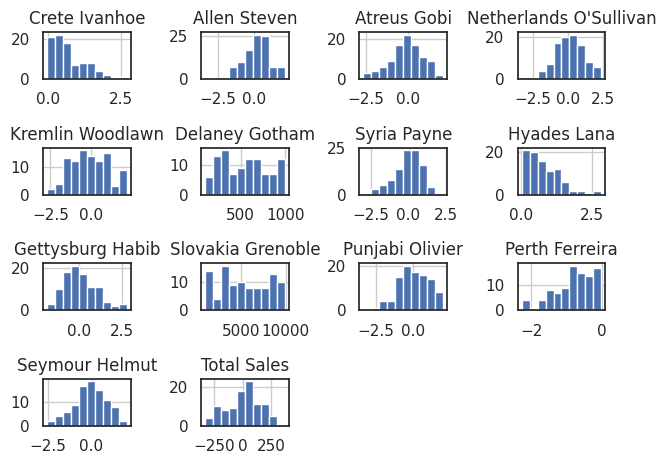

In [ ]:
# plot histograms

import matplotlib.pyplot as plt

reviewdf.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable

reviewdf.isnull().sum()

Crete Ivanhoe             9
Allen Steven              0
Atreus Gobi               0
Netherlands O'Sullivan    0
Kremlin Woodlawn          0
Delaney Gotham            0
Syria Payne               0
Hyades Lana               7
Gettysburg Habib          0
Slovakia Grenoble         0
Punjabi Olivier           0
Perth Ferreira            3
Seymour Helmut            7
Collar                    0
401K                      0
Medical                   0
Stars                     0
Total Sales               0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical

print(reviewdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 105
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crete Ivanhoe           91 non-null     float64
 1   Allen Steven            100 non-null    float64
 2   Atreus Gobi             100 non-null    float64
 3   Netherlands O'Sullivan  100 non-null    float64
 4   Kremlin Woodlawn        100 non-null    float64
 5   Delaney Gotham          100 non-null    int64  
 6   Syria Payne             100 non-null    float64
 7   Hyades Lana             93 non-null     float64
 8   Gettysburg Habib        100 non-null    float64
 9   Slovakia Grenoble       100 non-null    int64  
 10  Punjabi Olivier         100 non-null    float64
 11  Perth Ferreira          97 non-null     float64
 12  Seymour Helmut          93 non-null     float64
 13  Collar                  100 non-null    object 
 14  401K                    100 non-null    ob

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.01-Interpolation-Problem-Statement.html
# https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

import pandas as pd

reviewdf['Crete Ivanhoe'].fillna(round(reviewdf['Crete Ivanhoe'].median(),2), inplace=True)
reviewdf['Hyades Lana'].fillna(round(reviewdf['Hyades Lana'].median(), 2), inplace=True)
reviewdf['Perth Ferreira'].fillna(round(reviewdf['Perth Ferreira'].median(),2), inplace=True)
reviewdf['Seymour Helmut']=reviewdf['Seymour Helmut'].interpolate(method="linear")
reviewdf.isnull().sum()

Crete Ivanhoe             0
Allen Steven              0
Atreus Gobi               0
Netherlands O'Sullivan    0
Kremlin Woodlawn          0
Delaney Gotham            0
Syria Payne               0
Hyades Lana               0
Gettysburg Habib          0
Slovakia Grenoble         0
Punjabi Olivier           0
Perth Ferreira            0
Seymour Helmut            0
Collar                    0
401K                      0
Medical                   0
Stars                     0
Total Sales               0
dtype: int64

### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

In [ ]:
# train test split (Total Sales is the dependent (y) variable), print the shapes for X_train and X_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    reviewdf.drop('Total Sales',axis=1),
    reviewdf['Total Sales'],
    test_size=0.25,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)

(75, 17)
(25, 17)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe df
X_train.describe()

,Crete Ivanhoe,Allen Steven,Atreus Gobi,Netherlands O'Sullivan,Kremlin Woodlawn,Delaney Gotham,Syria Payne,Hyades Lana,Gettysburg Habib,Slovakia Grenoble,Punjabi Olivier,Perth Ferreira,Seymour Helmut
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.697383,0.194299,-0.053756,0.104559,-0.187385,536.506667,-0.036981,0.811279,0.069738,5608.906667,0.072747,-0.828306,-0.009737
std,0.542463,0.959631,1.045894,0.995938,1.146823,261.010374,0.881590,0.578032,0.980332,2591.039576,0.968078,0.567335,1.002384
min,-0.018998,-3.375895,-2.621517,-3.278170,-2.702658,100.000000,-3.010100,0.126008,-1.630323,1063.000000,-1.974639,-2.268921,-2.561318
25%,0.306816,-0.377718,-0.677643,-0.556336,-1.089070,310.000000,-0.473750,0.334069,-0.590970,3620.000000,-0.576760,-1.242345,-0.652363
50%,0.570000,0.169655,0.053411,0.136503,-0.120749,537.000000,0.112200,0.680000,-0.125492,5408.000000,0.071255,-0.778083,0.087002
75%,1.000122,0.801649,0.633513,0.714227,0.709027,737.500000,0.495950,1.114266,0.599292,7638.000000,0.710860,-0.339639,0.633513
max,2.692353,2.110839,2.037375,2.379210,1.993743,999.000000,2.315200,2.818696,2.764491,9942.000000,2.058119,-0.025625,2.037375


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
from sklearn.preprocessing import StandardScaler

#Apply standardization to Delaney Gotham column
X_train['Delaney Gotham'] = (X_train['Delaney Gotham'] - X_train['Delaney Gotham'].mean()) / X_train['Delaney Gotham'].std()
X_test['Delaney Gotham'] = (X_test['Delaney Gotham'] - X_test['Delaney Gotham'].mean()) / X_test['Delaney Gotham'].std()
print(X_train)

     Crete Ivanhoe  Allen Steven  Atreus Gobi  Netherlands O'Sullivan  \
15        0.693692     -0.243101     0.066157               -0.218888   
41        0.461327      0.291648     0.550782               -0.169965   
102       1.555073     -0.076965    -2.289743                0.069086   
9         0.000987     -1.269078     1.475923               -0.790105   
74        0.636001      0.160553    -0.716233               -0.206942   
..             ...           ...          ...                     ...   
62        0.612706     -0.720286     1.569779               -0.753090   
73        0.053451     -0.422073     0.030410                0.798737   
14        0.611588      1.358090     0.013098               -0.207472   
97        0.135484      0.332580    -1.771735               -0.668308   
53        0.204756      0.716677    -0.243476                0.606851   

     Kremlin Woodlawn  Delaney Gotham  Syria Payne  Hyades Lana  \
15          -0.671415        0.105334       0.3826     0

In [ ]:
# normalize feature
from sklearn.preprocessing import StandardScaler

#Apply normalization to Slovakia Grenoble column
X_train['Slovakia Grenoble'] = (X_train['Slovakia Grenoble'] - X_train['Slovakia Grenoble'].min()) /(X_train['Slovakia Grenoble'].max()-X_train['Slovakia Grenoble'].min())
X_test['Slovakia Grenoble'] = (X_test['Slovakia Grenoble'] - X_test['Slovakia Grenoble'].min()) /(X_test['Slovakia Grenoble'].max()-X_test['Slovakia Grenoble'].min())
print(X_train)

     Crete Ivanhoe  Allen Steven  Atreus Gobi  Netherlands O'Sullivan  \
15        0.693692     -0.243101     0.066157               -0.218888   
41        0.461327      0.291648     0.550782               -0.169965   
102       1.555073     -0.076965    -2.289743                0.069086   
9         0.000987     -1.269078     1.475923               -0.790105   
74        0.636001      0.160553    -0.716233               -0.206942   
..             ...           ...          ...                     ...   
62        0.612706     -0.720286     1.569779               -0.753090   
73        0.053451     -0.422073     0.030410                0.798737   
14        0.611588      1.358090     0.013098               -0.207472   
97        0.135484      0.332580    -1.771735               -0.668308   
53        0.204756      0.716677    -0.243476                0.606851   

     Kremlin Woodlawn  Delaney Gotham  Syria Payne  Hyades Lana  \
15          -0.671415        0.105334       0.3826     0

In [ ]:
# describe data again to verify transformations

X_train.describe()

,Crete Ivanhoe,Allen Steven,Atreus Gobi,Netherlands O'Sullivan,Kremlin Woodlawn,Delaney Gotham,Syria Payne,Hyades Lana,Gettysburg Habib,Slovakia Grenoble,Punjabi Olivier,Perth Ferreira,Seymour Helmut
count,75.000000,75.000000,75.000000,75.000000,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.697383,0.194299,-0.053756,0.104559,-0.187385,3.904284e-17,-0.036981,0.811279,0.069738,0.511984,0.072747,-0.828306,-0.009737
std,0.542463,0.959631,1.045894,0.995938,1.146823,1.000000e+00,0.881590,0.578032,0.980332,0.291817,0.968078,0.567335,1.002384
min,-0.018998,-3.375895,-2.621517,-3.278170,-2.702658,-1.672373e+00,-3.010100,0.126008,-1.630323,0.000000,-1.974639,-2.268921,-2.561318
25%,0.306816,-0.377718,-0.677643,-0.556336,-1.089070,-8.678071e-01,-0.473750,0.334069,-0.590970,0.287983,-0.576760,-1.242345,-0.652363
50%,0.570000,0.169655,0.053411,0.136503,-0.120749,1.890091e-03,0.112200,0.680000,-0.125492,0.489357,0.071255,-0.778083,0.087002
75%,1.000122,0.801649,0.633513,0.714227,0.709027,7.700588e-01,0.495950,1.114266,0.599292,0.740511,0.710860,-0.339639,0.633513
max,2.692353,2.110839,2.037375,2.379210,1.993743,1.771935e+00,2.315200,2.818696,2.764491,1.000000,2.058119,-0.025625,2.037375


In [ ]:
# df.info()

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 53
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crete Ivanhoe           75 non-null     float64
 1   Allen Steven            75 non-null     float64
 2   Atreus Gobi             75 non-null     float64
 3   Netherlands O'Sullivan  75 non-null     float64
 4   Kremlin Woodlawn        75 non-null     float64
 5   Delaney Gotham          75 non-null     float64
 6   Syria Payne             75 non-null     float64
 7   Hyades Lana             75 non-null     float64
 8   Gettysburg Habib        75 non-null     float64
 9   Slovakia Grenoble       75 non-null     float64
 10  Punjabi Olivier         75 non-null     float64
 11  Perth Ferreira          75 non-null     float64
 12  Seymour Helmut          75 non-null     float64
 13  Collar                  75 non-null     object 
 14  401K                    75 non-null     obj

In [ ]:
# check for outliers

for i in reviewdf._get_numeric_data().columns[1:]:
    q1 = reviewdf[i].quantile(0.25)
    q3 = reviewdf[i].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = reviewdf[i][reviewdf[i] < lower_fence].count()
    upper_count = reviewdf[i][reviewdf[i] > upper_fence].count()
    print(f'{i} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Allen Steven outliers = 3: lower_fence: -2.0, upper_fence: 2.0, lower_count: 1, upper_count: 2
Atreus Gobi outliers = 5: lower_fence: -2.0, upper_fence: 2.0, lower_count: 4, upper_count: 1
Netherlands O'Sullivan outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 0
Kremlin Woodlawn outliers = 0: lower_fence: -4.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
Delaney Gotham outliers = 0: lower_fence: -316.0, upper_fence: 1361.0, lower_count: 0, upper_count: 0
Syria Payne outliers = 5: lower_fence: -2.0, upper_fence: 2.0, lower_count: 4, upper_count: 1
Hyades Lana outliers = 5: lower_fence: -1.0, upper_fence: 2.0, lower_count: 0, upper_count: 5
Gettysburg Habib outliers = 4: lower_fence: -2.0, upper_fence: 2.0, lower_count: 0, upper_count: 4
Slovakia Grenoble outliers = 0: lower_fence: -3505.0, upper_fence: 14292.0, lower_count: 0, upper_count: 0
Punjabi Olivier outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 0
Perth Ferreir

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Crete Ivanhoe,1.356297
2,Allen Steven,1.112092
3,Atreus Gobi,17.677475
4,Netherlands O'Sullivan,1.224700
5,Kremlin Woodlawn,1.318280
6,Delaney Gotham,1.124677
7,Syria Payne,1.242512
8,Hyades Lana,1.326683
9,Gettysburg Habib,1.107726
10,Slovakia Grenoble,1.207777


In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
X_train.drop(['Atreus Gobi'],axis=1,inplace=True)
X_test.drop(['Atreus Gobi'],axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

(75, 16)
(25, 16)


In [ ]:
# verify you no longer have multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Crete Ivanhoe,1.336920
2,Allen Steven,1.102912
3,Netherlands O'Sullivan,1.165227
4,Kremlin Woodlawn,1.258469
5,Delaney Gotham,1.114436
6,Syria Payne,1.242511
7,Hyades Lana,1.322923
8,Gettysburg Habib,1.106522
9,Slovakia Grenoble,1.198284
10,Punjabi Olivier,1.274245


In [ ]:
# code the correlated relationships
import numpy as np

corrs = X_train.corr()

# get max of each column and row location
for i in range(len(corrs.columns)):
    for j in range(i):
        if abs(corrs.iloc[i, j]) > .5:
            print(f'{corrs.columns[i]} and {corrs.columns[j]}: {abs(corrs.iloc[i, j])}')

corrs


<ipython-input-135-82e9ac4df798>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = X_train.corr()


,Crete Ivanhoe,Allen Steven,Netherlands O'Sullivan,Kremlin Woodlawn,Delaney Gotham,Syria Payne,Hyades Lana,Gettysburg Habib,Slovakia Grenoble,Punjabi Olivier,Perth Ferreira,Seymour Helmut
Crete Ivanhoe,1.000000,0.076190,-0.019292,-0.326314,-0.001207,0.018574,0.035292,0.035483,0.097279,0.138362,0.265497,0.158217
Allen Steven,0.076190,1.000000,-0.130382,0.080278,0.056264,0.021100,0.081713,-0.107627,-0.061187,0.161826,0.026991,-0.044803
Netherlands O'Sullivan,-0.019292,-0.130382,1.000000,-0.084231,-0.045172,0.187399,0.066927,-0.087768,0.025617,0.114892,-0.110264,-0.244025
Kremlin Woodlawn,-0.326314,0.080278,-0.084231,1.000000,-0.047198,-0.139874,0.043496,0.045110,-0.130127,0.135350,-0.049676,0.123453
Delaney Gotham,-0.001207,0.056264,-0.045172,-0.047198,1.000000,-0.102792,-0.157322,0.013278,0.150595,-0.107425,-0.095491,-0.113357
Syria Payne,0.018574,0.021100,0.187399,-0.139874,-0.102792,1.000000,-0.186279,-0.054982,-0.087939,-0.032550,-0.030283,-0.227870
Hyades Lana,0.035292,0.081713,0.066927,0.043496,-0.157322,-0.186279,1.000000,-0.197330,-0.232741,0.069532,0.239169,-0.097258
Gettysburg Habib,0.035483,-0.107627,-0.087768,0.045110,0.013278,-0.054982,-0.197330,1.000000,0.082012,0.100208,-0.071041,0.120865
Slovakia Grenoble,0.097279,-0.061187,0.025617,-0.130127,0.150595,-0.087939,-0.232741,0.082012,1.000000,-0.234607,-0.082417,0.044341
Punjabi Olivier,0.138362,0.161826,0.114892,0.135350,-0.107425,-0.032550,0.069532,0.100208,-0.234607,1.000000,0.026557,-0.144637


<ipython-input-136-27ea54ba3949>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


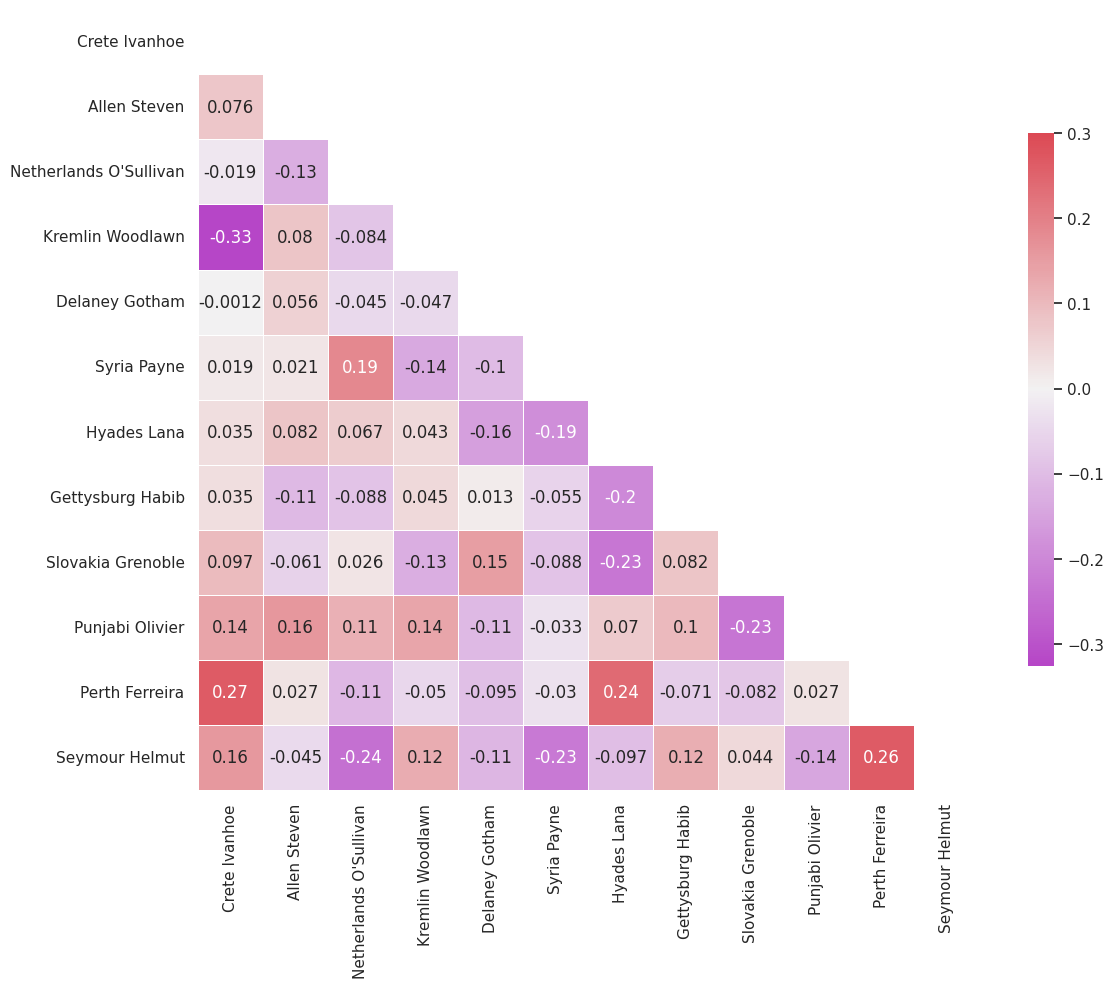

In [ ]:
# show correlation heat map for features, check for multicollinearity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(300, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()


<ipython-input-137-b273e616dc8f>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corrwith(y_train).plot.bar(title='X corr with y', rot=90, grid=True);


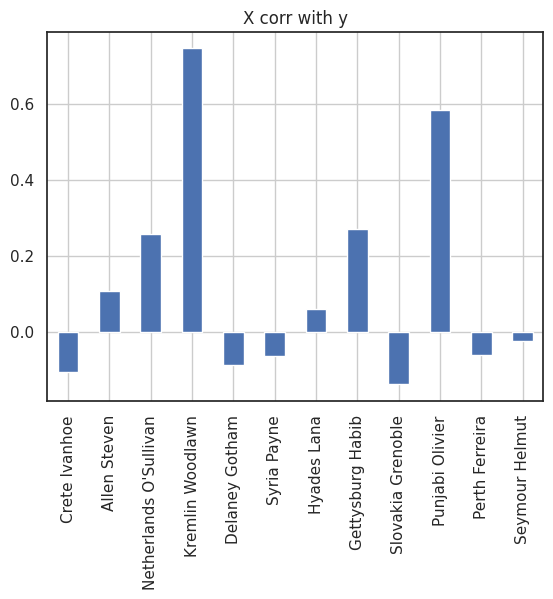

In [ ]:
# correlation with target

X_train.corrwith(y_train).plot.bar(title='X corr with y', rot=90, grid=True);

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()
model.fit(X_train._get_numeric_data(),y_train)

yhat=model.predict(X_test._get_numeric_data())
print(model.intercept_,model.coef_)
print('MSE :', mean_squared_error(y_test,yhat))
print('r-squared :',r2_score(y_test,yhat))


-20.982031487625637 [19.69175052  6.11541467 45.37304319 99.58616579 -0.57348314  1.75659629
  7.44656748 36.4669343  16.55480458 67.34608518 -1.75096296 -2.71544161]
MSE : 2149.528558083573
r-squared : 0.8825901479940611


In [ ]:
# create an OLS model from statsmodels and print the summary

import statsmodels.api as sm
X = X_train._get_numeric_data().copy()
# add constant
X.insert(0,'const',1)
model=sm.OLS(y_train,X).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     56.14
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.22e-28
Time:                        01:17:33   Log-Likelihood:                -392.29
No. Observations:                  75   AIC:                             810.6
Df Residuals:                      62   BIC:                             840.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -20.9820     21.791     -0.963      0.339     -64.542      22.578
Crete Ivanhoe             19.6918     12.324      1.598      0.115      -4.943      44.327
Allen Steven               6.1154      6.327      0.966      0.338      -6.533      18.764
Netherlands O'Sullivan    45.3730      6.267      7.240      0.000      32.846      57.900
Kremlin Woodlawn          99.5862      5.656     17.608      0.000      88.281     110.892
Delaney Gotham            -0.5735      6.104     -0.094      0.925     -12.774      11.627
Syria Payne                1.7566      7.310      0.240      0.811     -12.857      16.370
Hyades Lana                7.4466     11.505      0.647      0.520     -15.551      30.444
Gettysburg Habib          36.4669      6.204      5.878      0.000      24.065      48.868
Slovakia Grenoble         16.5548     21.688      0.763      0.448     -26.800      59.909
Punjabi Olivier           67.3461      6.742      9.989      0.000      53.869      80.823
Perth Ferreira            -1.7510     11.423     -0.153      0.879     -24.586      21.084
Seymour Helmut            -2.7154      6.789     -0.400      0.691     -16.286      10.855
==============================================================================
Omnibus:                        6.222   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.447
Skew:                          -0.609   Prob(JB):                       0.0656
Kurtosis:                       3.509   Cond. No.                         9.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

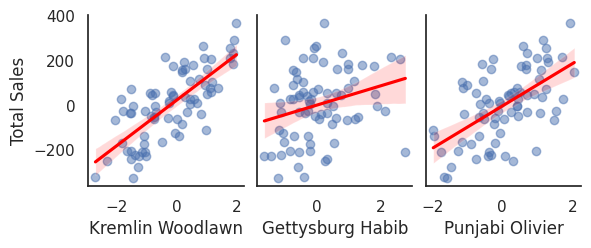

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals


import pandas as pd
import seaborn as sns
X = X_train._get_numeric_data().copy()
sns.pairplot(data=pd.concat([X,y_train],axis=1),
             x_vars=['Kremlin Woodlawn','Gettysburg Habib','Punjabi Olivier'],y_vars='Total Sales',
             kind='reg',
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'},
                       'scatter_kws':{'alpha':0.5}
             }
             );

### Extra Credit

For extra credit, take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
# code here
X=X_train[['Kremlin Woodlawn','Gettysburg Habib','Punjabi Olivier']].copy()
y=y_train
print('StatsModel')
print(model.params)
print()
print('Numpy Linear Algebra')
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
print(np.matmul(np.linalg.inv(np.matmul(X.values.T, X.values)), np.matmul(X.values.T, y)))
print(f' Equation is  y={round(w[0],2)}+{round(w[1],2)}*x1+{round(w[2],2)}*x2')

StatsModel
const                    -20.982031
Crete Ivanhoe             19.691751
Allen Steven               6.115415
Netherlands O'Sullivan    45.373043
Kremlin Woodlawn          99.586166
Delaney Gotham            -0.573483
Syria Payne                1.756596
Hyades Lana                7.446567
Gettysburg Habib          36.466934
Slovakia Grenoble         16.554805
Punjabi Olivier           67.346085
Perth Ferreira            -1.750963
Seymour Helmut            -2.715442
dtype: float64

Numpy Linear Algebra
weights =  [90.043961   31.73073869 77.73227759]
[90.043961   31.73073869 77.73227759]
 Equation is  y=90.04+31.73*x1+77.73*x2


### Summary

Share some thoughts on what you have discovered during this analysis

We have used make_regression method to simulate random data, then we have converted that dataset into dataframe. We then used train test split to train the dataframe.We have used shape,describe and hist methods on this trained data.

From histograms we can see that X_train is having skewed and normal data,we have replaced missing data with median for skewed data and used interpolation of regular method for normal data. We found VIF of all variables and then removed multicollinearity by dropping one of the coulmn.We plotted correlation heat map and could see that multicollinearity is removed.Then the X_train correlation with Target y_train is taken and could see Kremlin Woodlawn is highly correlated with y.

We built a linear regression model, then found parameters of mean squared error and r-squared error, intercepts and coefficients. The squared values are used to reduce the errors, then we presented the summary of our model which has same coefficients and r-squared values as above linear regression model.

We then drwan the pairplot, in this the red line indicates the correlation between the features and the spread of the color shows confidence interval which is spread out at the ends as little data is present and is narrowed at the middle.